# Wizualizacja danych w `matplotlib` i `seaborn`

## Wykres liniowy

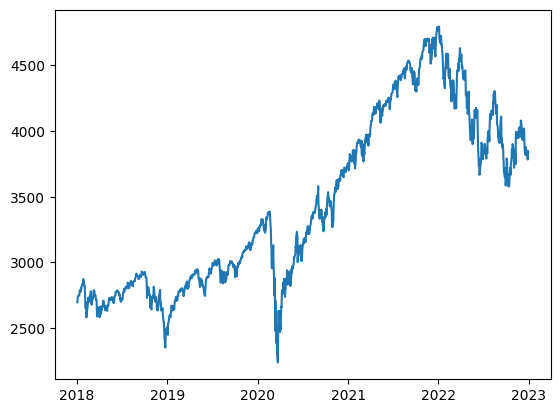

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

plt.plot(df.index, df.Close) # Wskazówka: jeśli jedną z osi są daty, warto zapewnić typ danych datetime

## Dodawanie wielu wykresów, tytułów, legendy

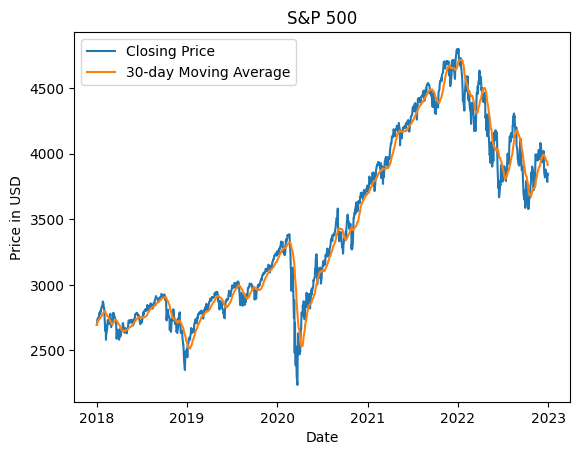

In [ ]:
plt.plot(df.index, df.Close, label="Closing Price")
plt.plot(df.index, df.Close.rolling('30D').mean(), label="30-day Moving Average")

plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()

## Histogram

Text(0.5, 1.0, 'Histogram of Sepal Width')

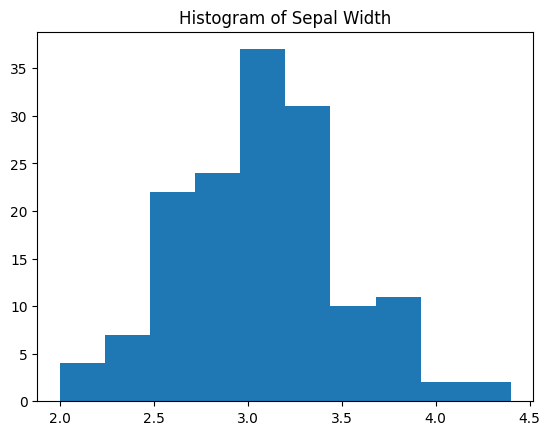

In [ ]:
iris = pd.read_csv("iris.csv")

plt.hist(iris.sepal_width, bins=10)
plt.title("Histogram of Sepal Width")

## Wykres pudełkowy

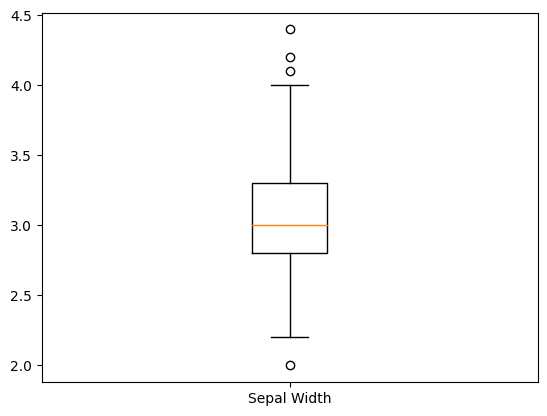

In [ ]:
plt.boxplot(iris.sepal_width, labels=["Sepal Width"]);

Aby stworzyć kilka wykresów pudełkowych można podać listę zawierającą kilka wektorów z danymi numerycznymi, lub `DataFrame`. Parametr `vert` pozwala rysować wykres w pionie lub poziomie.

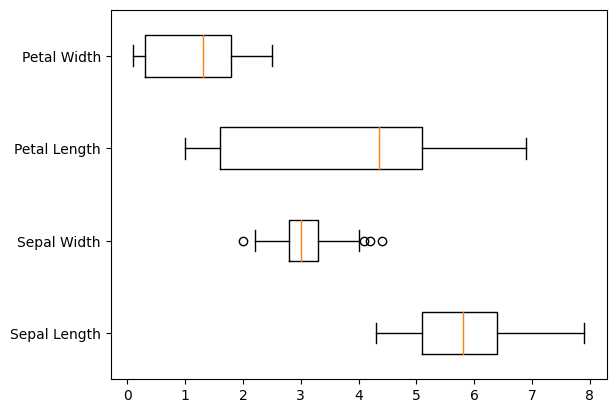

In [ ]:
iris_numeric = iris.drop("variety", axis=1)
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.boxplot(iris_numeric, labels=tick_labels, vert=False);

## Wykres słupkowy
Wykres słupkowy pionowy tworzymy metodą `plt.bar()`, a poziomy `plt.barh()`. Na wykresie możemy zaznaczyć błędy pomiaru podając `yerr`, lub `xerr` - w tym przypadku zaznaczam 2SE (przybliżona szerokość 95% przedziału ufności). W poniższym przykładzie ilustruję też dodawanie napisów metodą `plt.annotate()`.

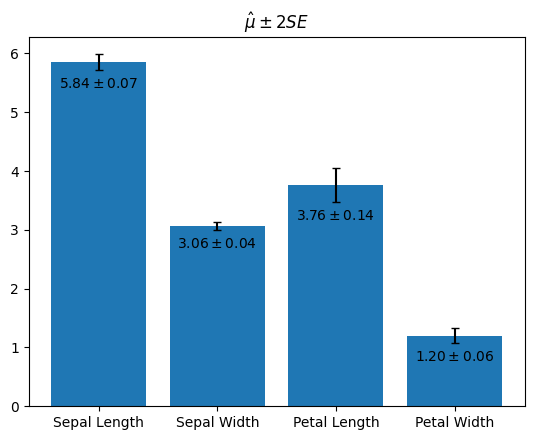

In [ ]:
SE = iris_numeric.apply(lambda x: x.std()/(x.size**0.5), axis=0) # SE = sigma/sqrt(n)

plt.bar(iris_numeric.columns, iris_numeric.mean(), yerr=2*SE, capsize=3)

plt.title(r"$\hat{\mu} \pm 2SE$")
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.xticks(ticks=iris_numeric.columns, labels=tick_labels)

for col in iris_numeric:
    mu = iris_numeric[col].mean()
    plt.annotate(text=f"${mu:.2f} \pm {SE[col]:.2f}$",
                 xy=(col, mu-2*SE[col]-0.3),
                 horizontalalignment='center')

## Wykres punktowy

Text(0, 0.5, 'Petal Width')

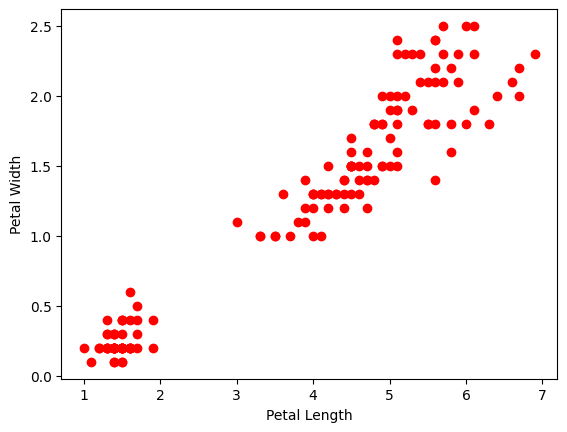

In [ ]:
plt.scatter(x="petal_length", y="petal_width", c="r", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Dodawanie koloru do wykresu
W przykładzie powyżej ustawiliśmy czerwony kolor punktów podając `c="r"`. Możliwe jest także podanie wektora zawierającego kolor każdego punktu.

Text(0, 0.5, 'Petal Width')

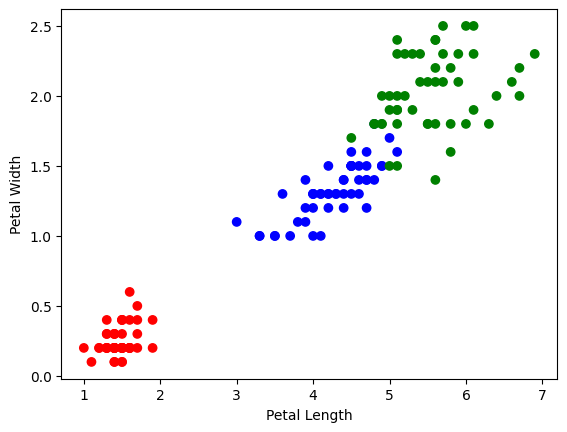

In [ ]:
color = iris.variety.map({"Setosa": "r", "Versicolor": "b", "Virginica": "g"})

plt.scatter(x="petal_length", y="petal_width", c=color, data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Alternatywną metodą jest podanie kodów 0, 1, 2, ..., które zostaną automatycznie mapowane na kolory. Takie kody można wygenerować np. metodą `factorize()`. Opcjonalnie można podać mapę kolorów `cmap` ([więcej o mapach kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

Text(0, 0.5, 'Petal Width')

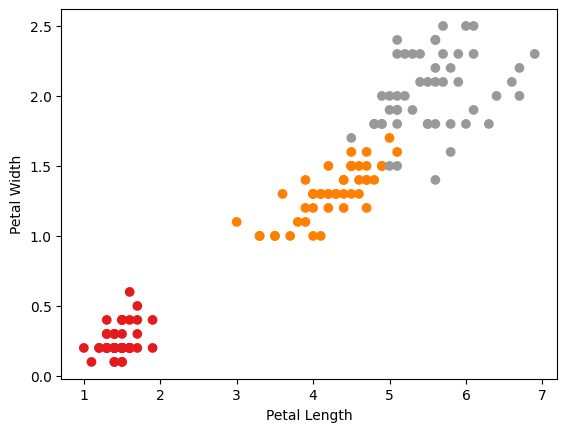

In [ ]:
codes, uniques = iris.variety.factorize()
plt.scatter(x="petal_length", y="petal_width", c=codes, cmap='Set1', data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Mapowanie kolumny kategorycznej na kolor jest dużo prostsze w Seaborn:

Text(0, 0.5, 'Petal Width')

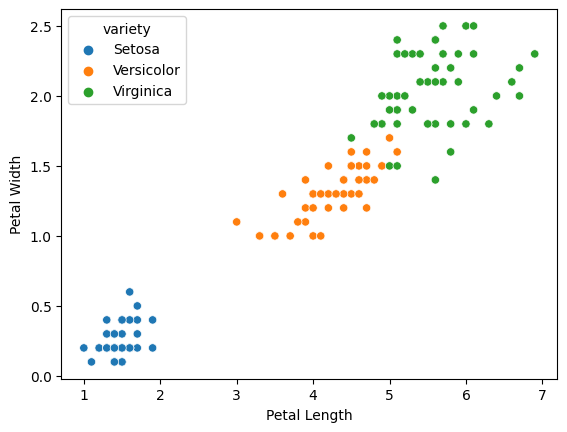

In [ ]:
import seaborn as sns
sns.scatterplot(x="petal_length", y="petal_width", hue="variety", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Działa to też np. w `sns.boxplot()` (dane trzeba przedtem wstępnie przekształcić w format 'długi').

<Axes: xlabel='Measurement', ylabel='Value'>

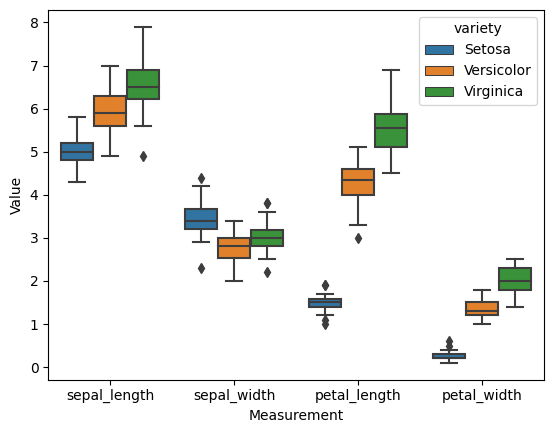

In [ ]:
iris_long = iris.melt(id_vars="variety",
                      value_vars=iris.columns[:-1],
                      var_name="Measurement",
                      value_name="Value")
sns.boxplot(x=iris_long.Measurement,
            y=iris_long.Value,
            hue=iris_long.variety,
            orient='v')

## `subplots()`
Aby tworzyć wiele wykresów na jednej figurze wykorzystujemy metodę `plt.subplots()` podając jako argumenty liczbę wierszy i kolumn. Metoda zwraca obiekt `Figure` i `np.array` zawierający odpowiednie osie (`Axes`), na których możemy tworzyć wykresy tymi samymi metodami, które są dostępne bezpośrednio w `plt`. Często metoda `subplots()` jest przydatna nawet jeśli tworzymy tylko jeden wykres, ponieważ daje kontrolę nad parametrami figury (możemy np. ustawić jej rozmiar).

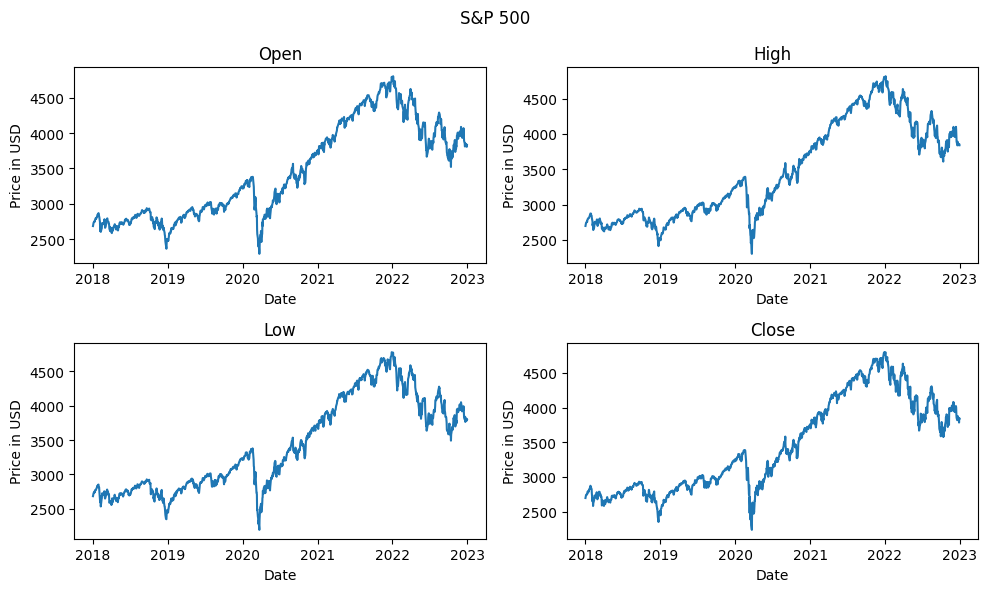

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # Rozmiar w calach

for col, ax in zip(df.columns[:4], axes.ravel()):
    ax.plot(df.index, df[col])
    ax.set_title(col)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")

fig.suptitle("S&P 500")
fig.tight_layout() # Zapewnia miejsce na tytuły wykresów

## `pairplot()`
Bardzo przydatnym narzędziem we wstępnej eksploracji danych są wykresy par zmiennych, tzw. *pairplot* lub *scatter matrix*.

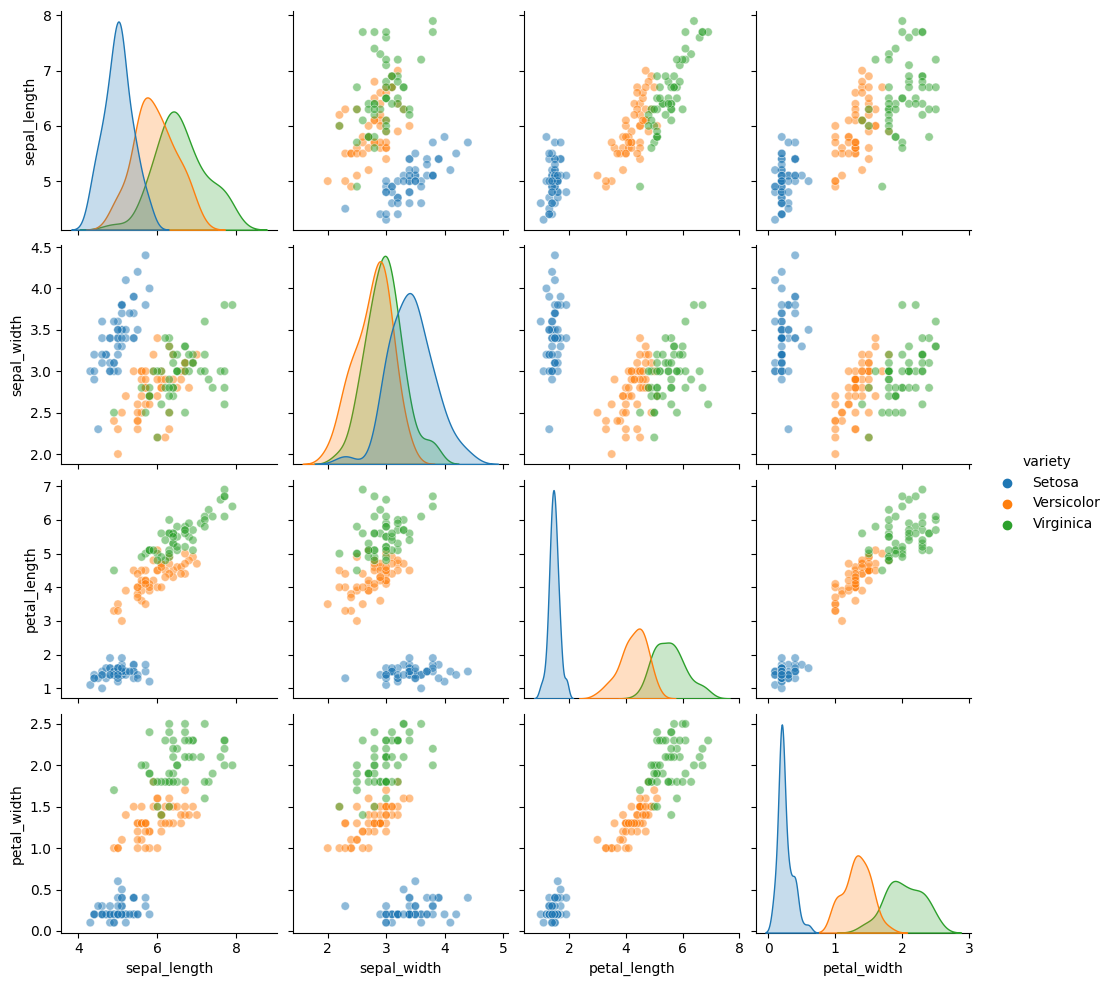

In [ ]:
sns.pairplot(data=iris, hue="variety", plot_kws={'alpha': 0.5})

W niektóych przypadkach, np. kiedy mamy bardzo wiele zmiennych, wygodniej jest zwizualizować macierz korelacji. Nadaje się do tego wykres `heatmap`.

Text(0.5, 1.0, 'Correlation Matrix')

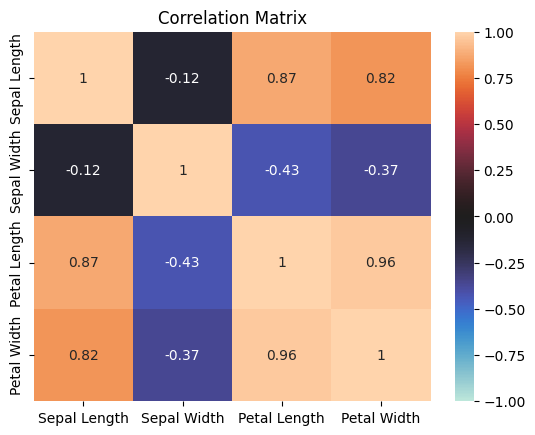

In [ ]:
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
sns.heatmap(data=iris.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            annot=True,
            center=0,
            xticklabels=tick_labels,
            yticklabels=tick_labels)
plt.title("Correlation Matrix")

## Zadania

1. Wczytaj plik `SP500.csv`, a następnie:
    - Stwórz histogram dziennych obrotów (`Volume`). Wybierz odpowiednią liczbę koszyków parametrem `bins`. Sprawdź w [dokumentacji `hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), jak stworzyć histogram gęstości.
    - Rozkład dziennych obrotów wizualizuj także za pomocą wykresu pudełkowego.
    - Wskazówka: bardziej czytelne będą wykresy dla dziennych obrotów w mln szt. (`Volume / 10e6`). W przypadku skalowania danych, pamiętaj o zaznaczeniu tego na wykresie (np. w opisie osi).

2. Wczytaj plik `waw_weather_monthly.csv`, a następnie:
    - Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin).
    - Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
    - Pamiętaj o dodaniu odpowiednich opisów osi i tytułów. Aby nazwy miesięcy były czytelne, należy je obrócić (np. `plt.xticks(rotation=90)`).
    - Opcjonalnie: Dodaj anotacje (`plt.annotate()`) z minimalną i maksymalną wartością temperatury pod i nad każdym słupkiem.

3. Wczytaj plik `world_bank_co2.csv`, a następnie:
    - Stwórz wykres punktowy pokazujący zależność między `GDP/capita, PPP` a `CO2/capita` za pomocą `plt.scatter()`.
    - Stwórz podobny wykres za pomocą `sns.scatterplot()`, tak aby kolory punktów (`hue`) odpowiadały regionom, a rozmiary (`size`) populacji (w mln).
    - Wskazówka: często wykresy punktowe są czytelniejsze po odpowiednim dobraniu parametru `alpha`.

4. Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("SP500.csv")
plt.hist(df.Volume, 25)

(array([  2.,   4.,   3.,   5.,  27., 103., 214., 229., 177., 136., 101.,
         81.,  44.,  38.,  25.,  11.,  17.,   7.,   3.,   6.,   7.,   4.,
          7.,   3.,   5.]),
 array([7.20300000e+08, 8.93945181e+08, 1.06759036e+09, 1.24123554e+09,
        1.41488073e+09, 1.58852591e+09, 1.76217109e+09, 1.93581627e+09,
        2.10946145e+09, 2.28310663e+09, 2.45675181e+09, 2.63039699e+09,
        2.80404218e+09, 2.97768736e+09, 3.15133254e+09, 3.32497772e+09,
        3.49862290e+09, 3.67226808e+09, 3.84591326e+09, 4.01955844e+09,
        4.19320363e+09, 4.36684881e+09, 4.54049399e+09, 4.71413917e+09,
        4.88778435e+09, 5.06142953e+09]),
 <BarContainer object of 25 artists>)

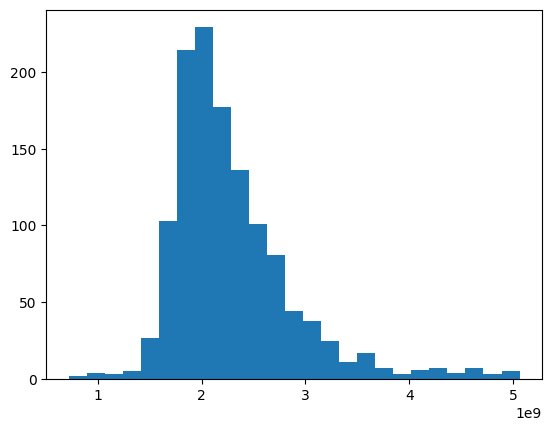

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("SP500.csv")
plt.hist(df.Volume, 25)

Text(0.5, 1.0, 'Boxplot of volume/10e6 from SP500')

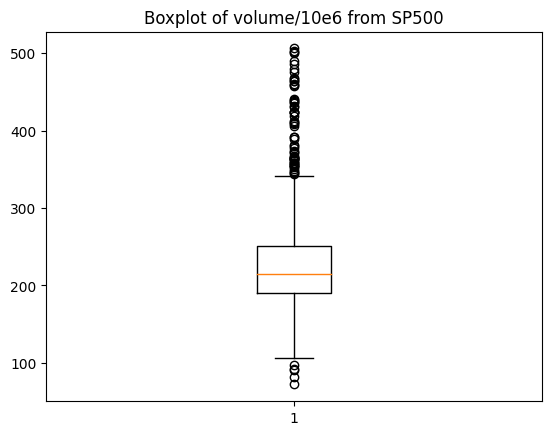

In [10]:
df = pd.read_csv("SP500.csv")
plt.boxplot(df.Volume / 10e6,);
plt.title("Boxplot of volume/10e6 from SP500")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

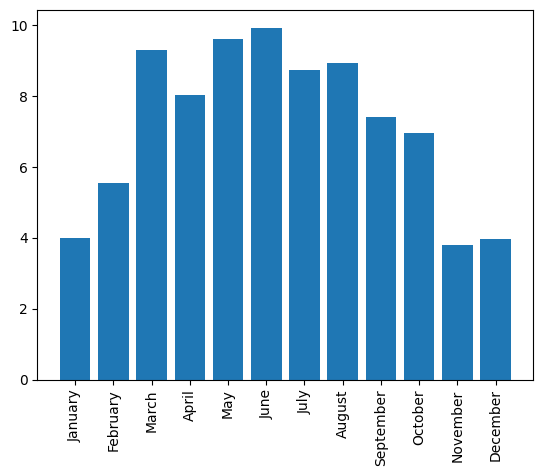

In [37]:
#Zad2
www=pd.read_csv("waw_weather_monthly.csv")
plt.bar(www.time,(www.temperature_2m_max-www.temperature_2m_min))
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

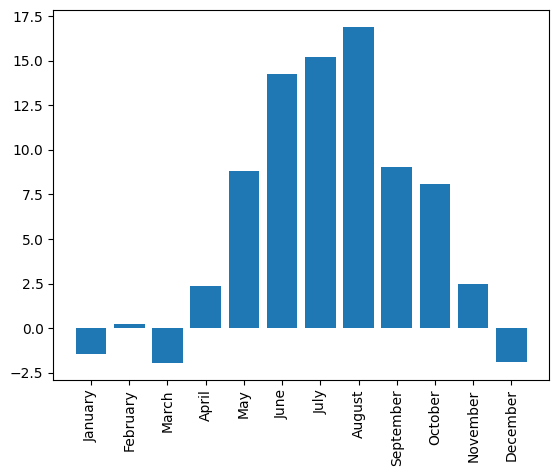

In [36]:
plt.bar(www.time, www.temperature_2m_min)
plt.xticks(rotation=90)


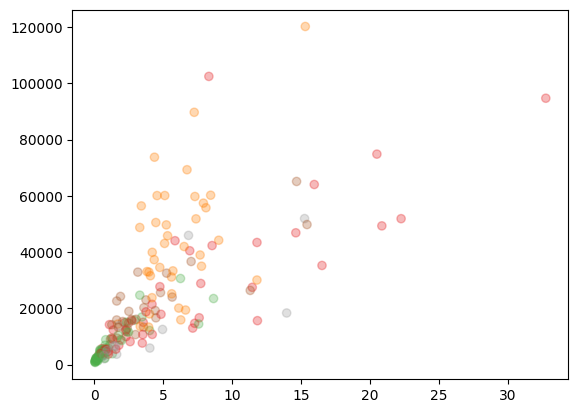

In [69]:
#Zad3
wbc=pd.read_csv("world_bank_co2.csv")
codes, uniques = wbc.Region.factorize()
plt.scatter(wbc.columns[4], wbc.columns[5], alpha=0.3,c=codes, cmap='Set1', data=wbc)

Text(0, 0.5, 'GDP/capita')

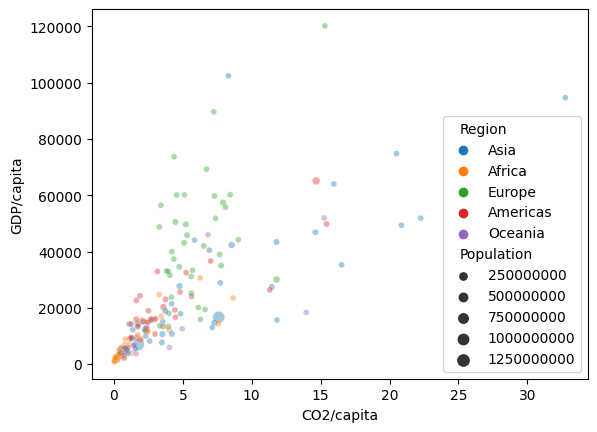

In [74]:
sns.scatterplot(x="CO2/capita", y="GDP/capita, PPP", alpha=0.4 , size="Population" ,hue="Region", data=wbc)
plt.xlabel("CO2/capita")
plt.ylabel("GDP/capita")

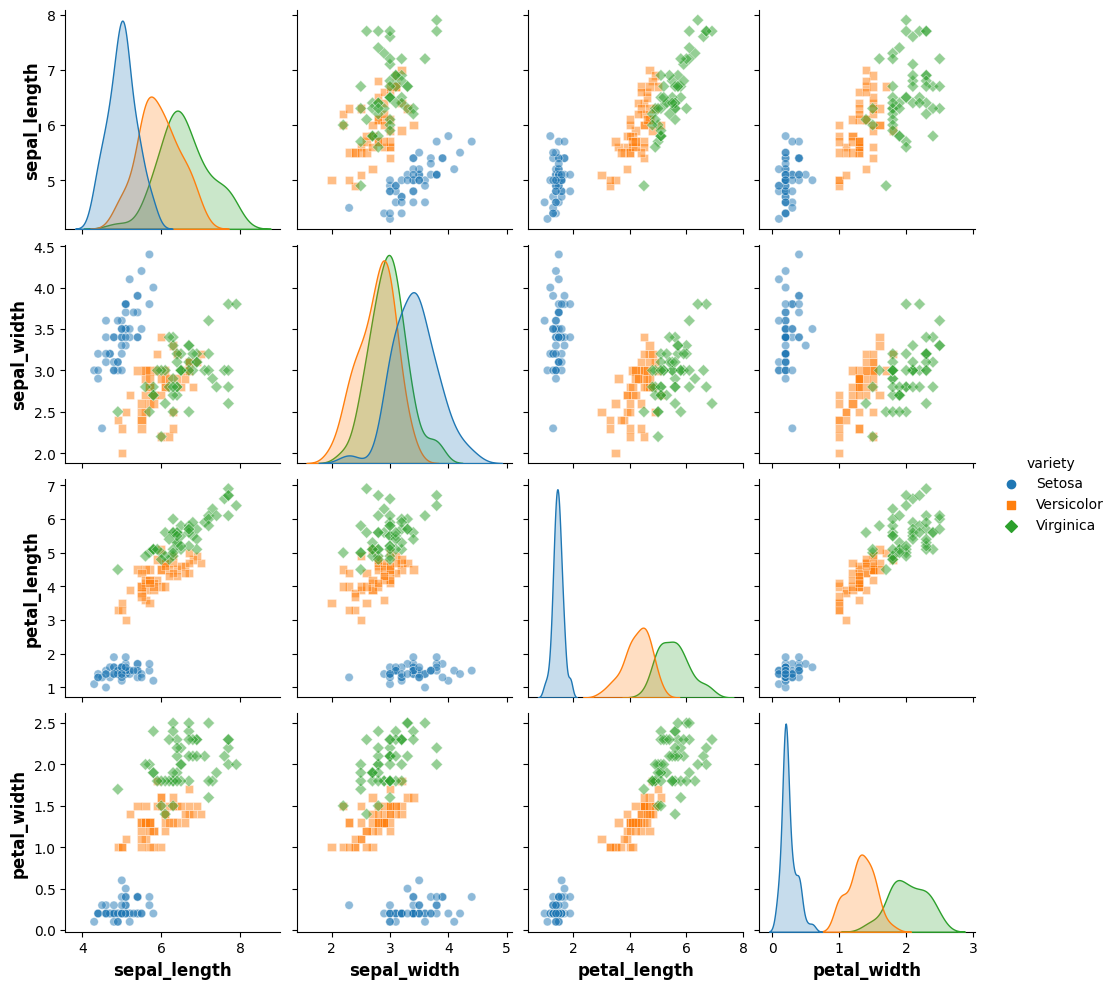

In [ ]:
#Zad4
df = pd.read_csv("iris.csv")

g = sns.pairplot(df, hue="variety", markers=["o", "s", "D"],plot_kws={'alpha':0.5})
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.show()